# Sheet 2

In [169]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

## 1 Kernel Density Estimation
(a)

- u = abs(x[i]-mu)/w
- create a mask and multiply
- our kernel looks wrong

In [310]:
def biweight(x, mu, w):
    """biweight kernel at mean mu, with bandwidth w evaluated at x"""
    #TODO: implement the quartic (biweight) kernel
    k=[]
    for i in range(0,len(x)):
        u = abs(x[i]-mu)/w
        if(u<=w):
            k.append((15/(16*w))*((1-(u)**2)**2))
        else:
            k.append(0)

    return np.array(k)

Text(0.5, 1.0, 'Quartic Kernel')

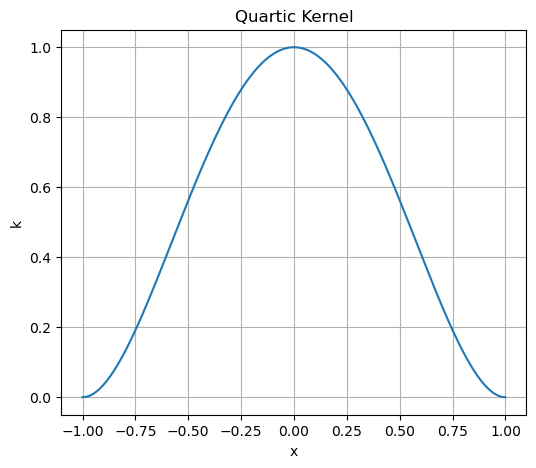

In [311]:
x = np.arange(-1,1,0.001)
k = biweight(x,0,1)

# TODO plot the kernel
plt.figure(figsize=(6,5))
plt.plot(x,k/np.max(k))
plt.grid()
plt.xlabel("x")
plt.ylabel("k")
plt.title("Quartic Kernel")


In [312]:
len(k)

2000

(b)

In [313]:
# load the data
data = np.load("data/samples.npy")
data50 = data[:50]
print(f'{data.shape=}, {data50.shape=}')

data.shape=(10000,), data50.shape=(50,)


Kernel Algorithm:

$$
f(x) = \frac{1}{nw} \sum^n_{i=0}k\left(\frac{X_i - x}{w}\right)
$$

- $k$ = kernel 
- $n$ = no. of data points
- $w$ = bandwidth
- $X_i$ = observation

In [314]:
def gaussian(x,b=1):
    return np.exp(-x**2/(2*b**2))/(b*np.sqrt(2*np.pi))

In [315]:
def kde(x, obs, w=1):
    # TODO: implement the KDE with the biweight kernel
    n = 50
    k_sum = np.zeros(len(x))
    for i in range(0,n):
        # k_sum += ((gaussian(x-obs[i],w))/n) we tried Gaussian too
        k_sum += ((biweight(x,obs[i],w))/n)

    fx = k_sum
    return fx #use np.mean directly, vectorize

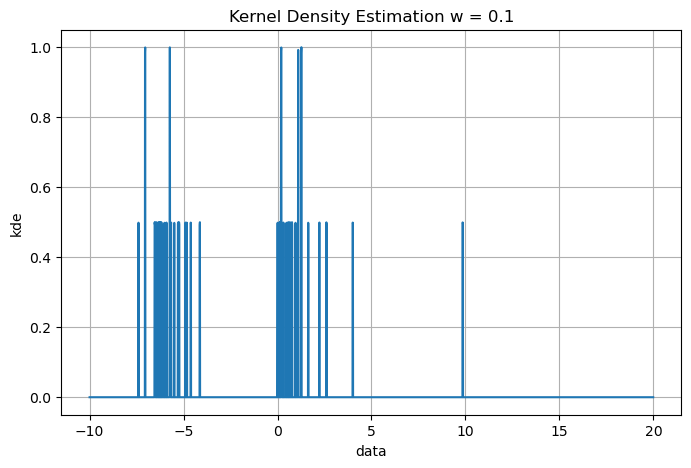

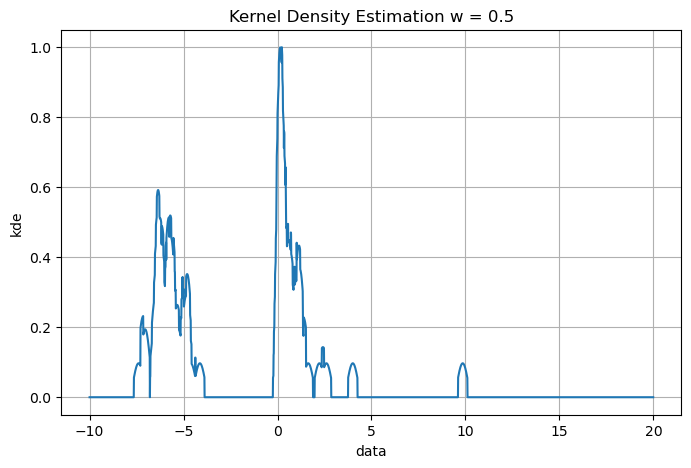

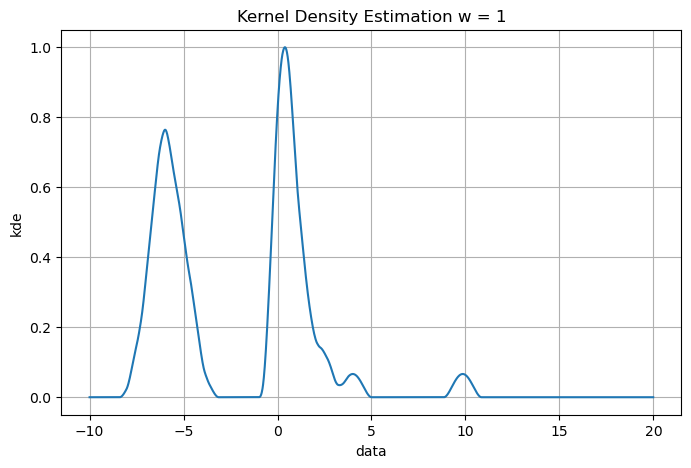

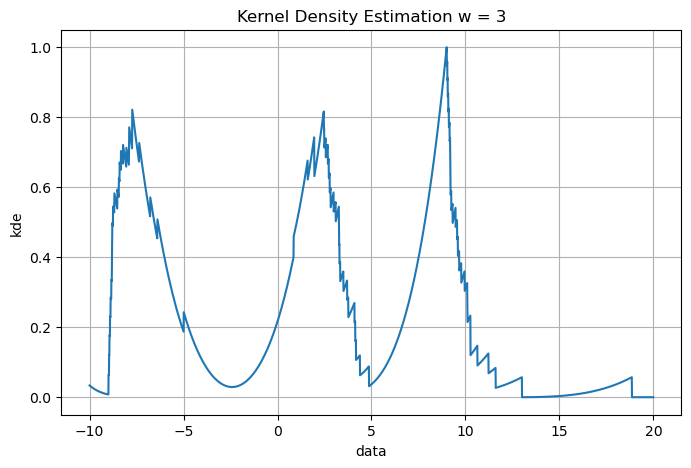

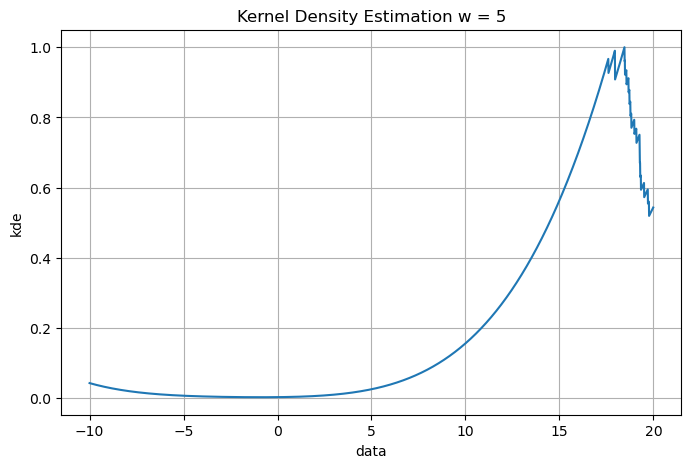

In [316]:
# TODO: compute and plot the kde on the first 50 data points
w = [0.1, 0.5, 1, 3, 5]
# w = [10,20]
x = np.arange(-10,20,0.01)


    # x = np.arange(-bw,bw,0.001)
for bw in w:    
    plt.figure(figsize=(8,5),facecolor= "white")
    fx = kde(x,data50,bw)
    plt.plot(x,fx/(np.max(fx)),label=f"{bw}")
    plt.grid()
    plt.xlabel("data")
    plt.ylabel("kde")
    plt.title(f"Kernel Density Estimation w = {bw}")

# TODO: explore what happens when you increase the number of points


### With more data points(100)

for more data points smallesrt bandwidth is thebest option.

In [301]:
data5k = data[:5000] #taking 100 data points

Text(0.5, 1.0, 'Kernel Density Estimation')

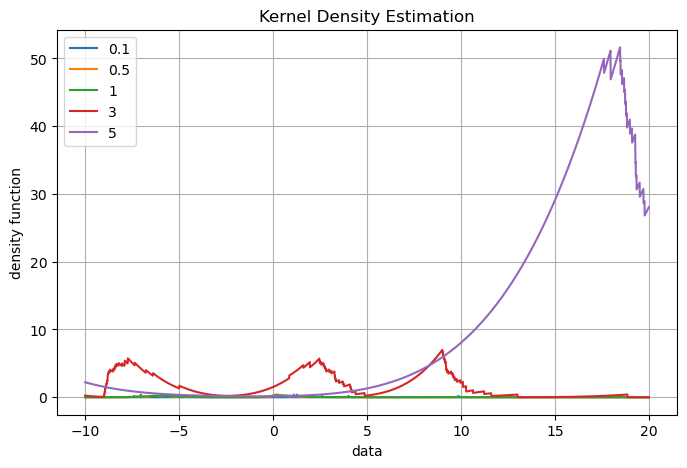

In [302]:
w = [0.1, 0.5, 1, 3, 5]
# w = [10,20]
x = np.arange(-10,20,0.01)


    # x = np.arange(-bw,bw,0.001)
    
plt.figure(figsize=(8,5),facecolor= "white")
for bw in w:
    fx = kde(x,data5k,bw)
    plt.plot(x,fx,label=f"{bw}")
plt.grid()
plt.xlabel("data")
plt.ylabel("density function")
plt.legend()
plt.title(f"Kernel Density Estimation")

## 3 Mean-Shift

(a)

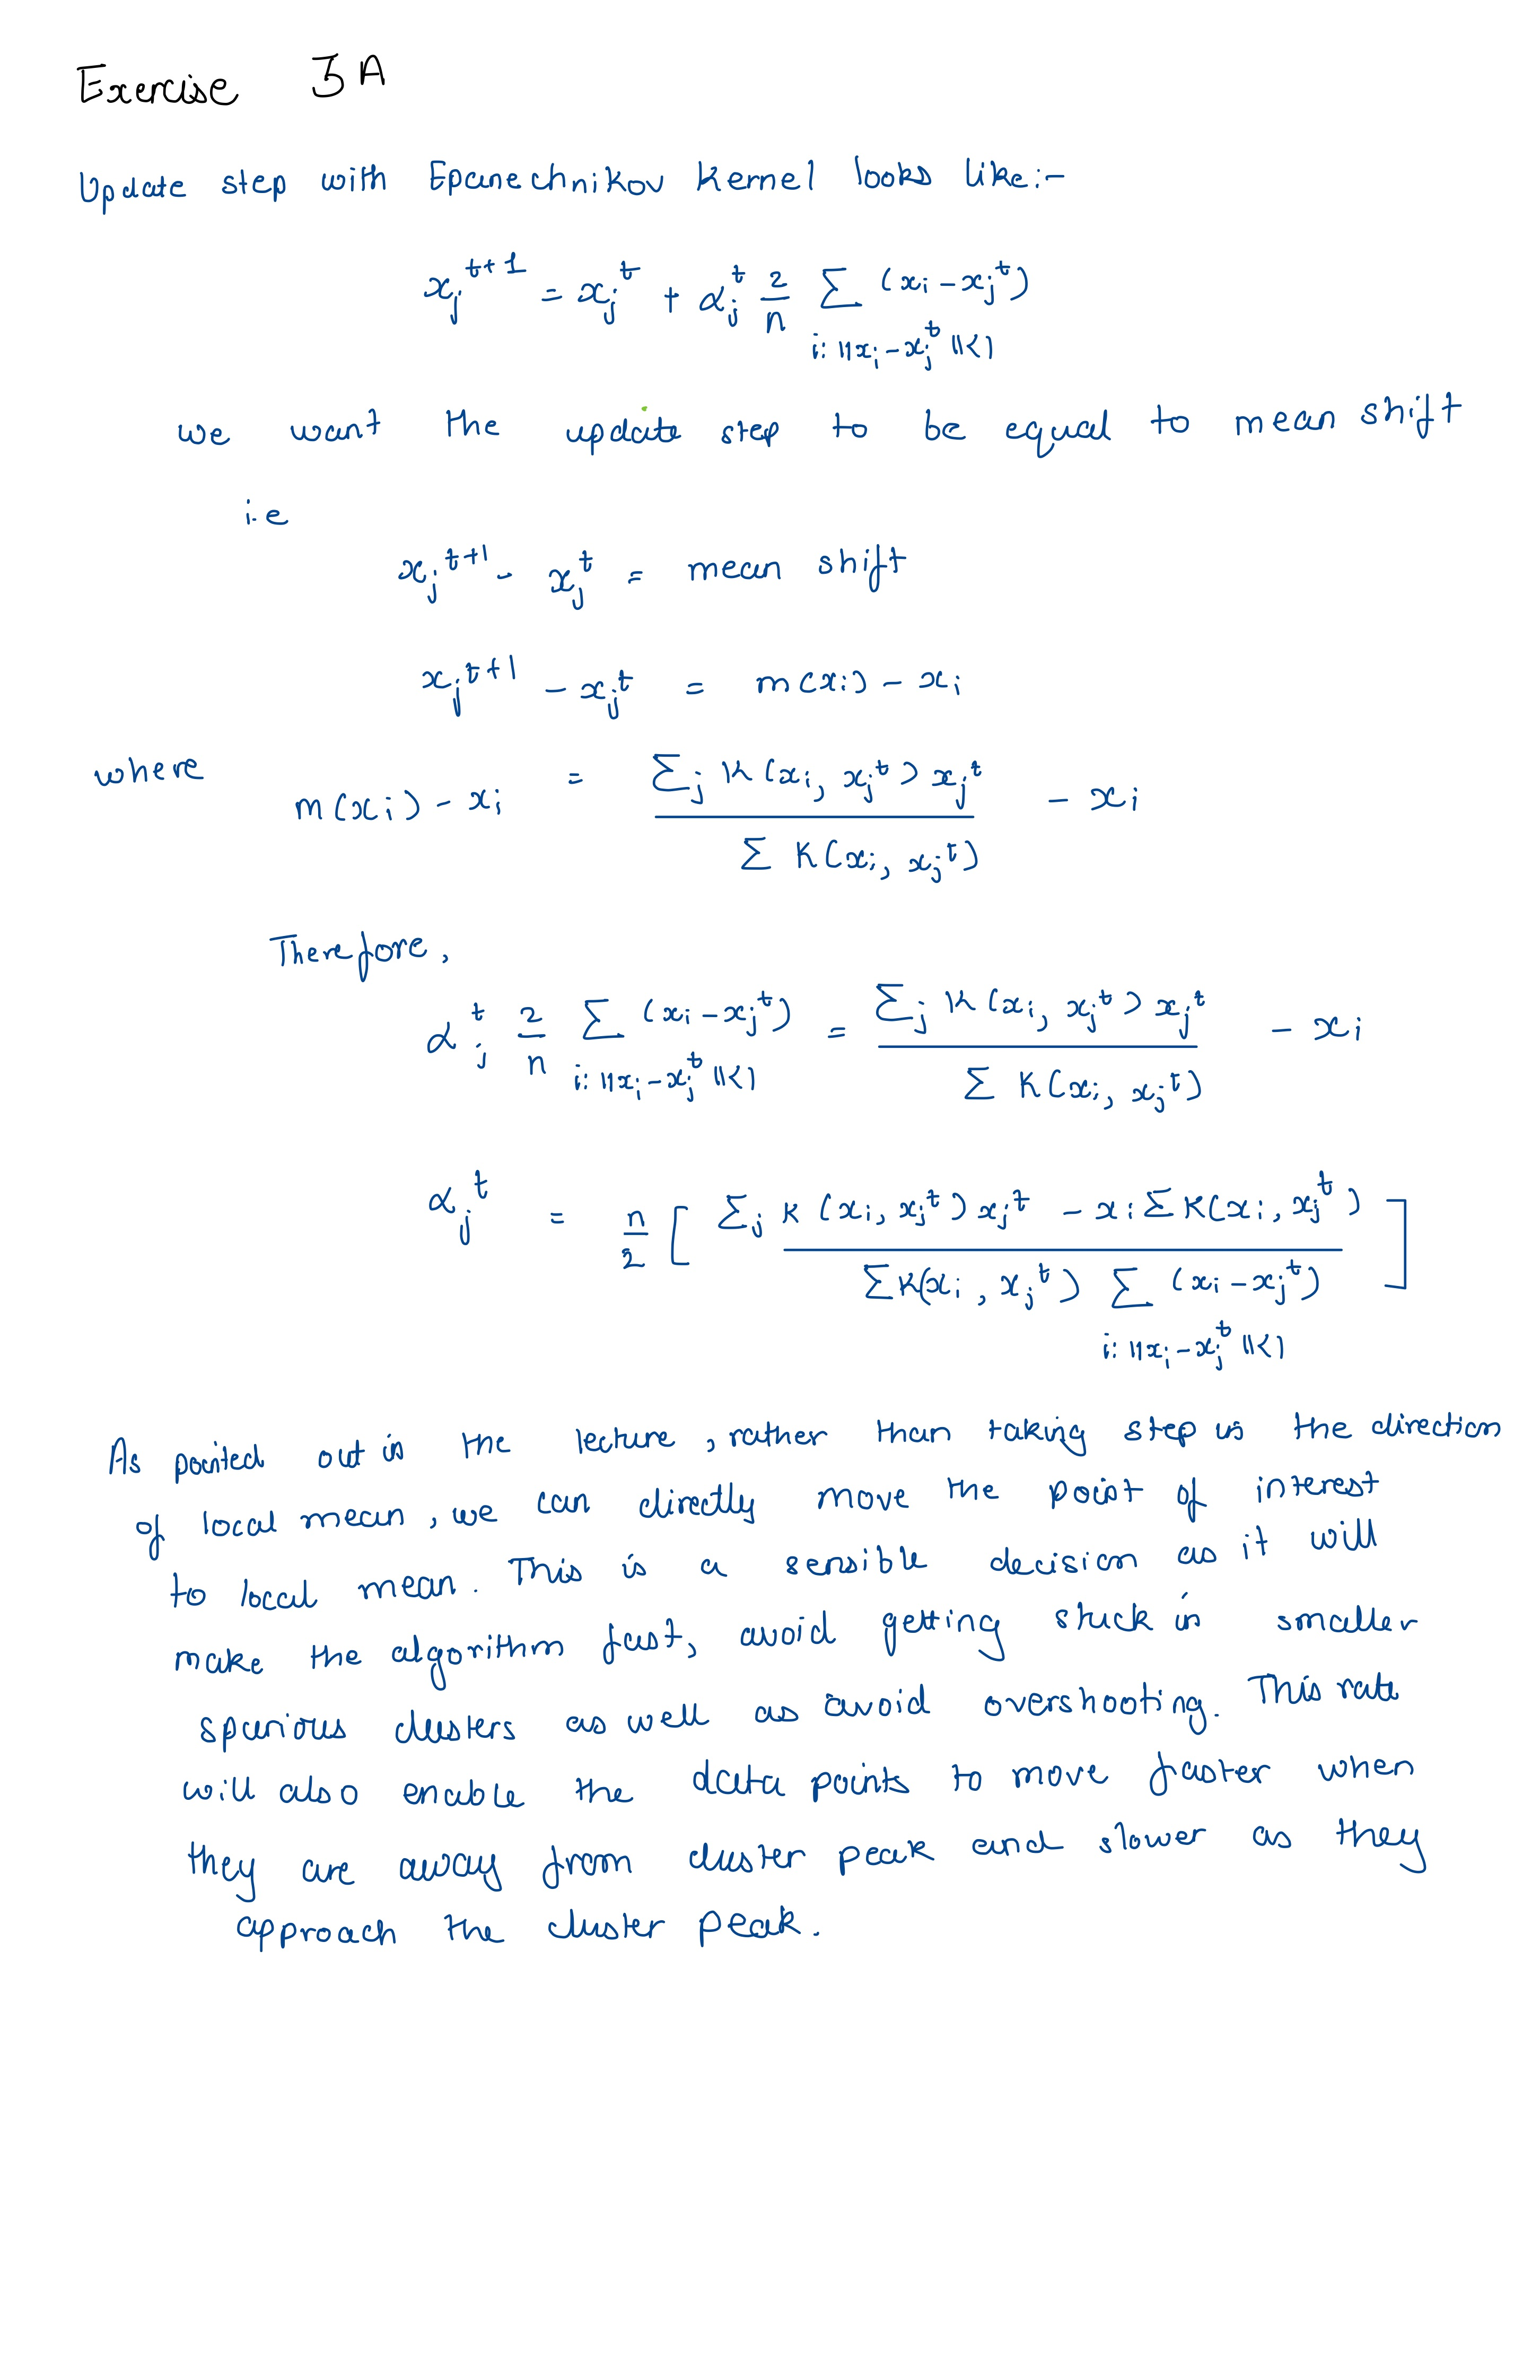

In [576]:
from IPython.display import Image
Image(filename='ex3aMS.jpg') 

Denominator tells us that higher the number of neighnours higher the learning rate.

(b) bonus

In [570]:
# TODO: implement the update to the local mean

def mean_shift_step(x, xt, r=1):
    """
    A single step of mean shift, moving every point in xt to the local mean of points in x within a radious of r.
    
    Parameters
    ----------
    x : np.ndarray
        Array of points underlying the KDE, shape (d, N1)
    xt : np.ndarray
        Current state of the mean shift algorithm, shape (d, N2)
    
        
    Returns
    -------
    np.ndarray
        the points after the mean-shift step
    """
    # NOTE: For the excercise you only need to implement this for d == 1. 
    #       If you want some extra numpy-practice, implement it for arbitrary dimension
    
    assert xt.shape[0] == x.shape[0], f'Shape mismatch: {x.shape[0]}!={xt.shape[0]}'
    
    # TODO: compute a N by N matrix 'dist' of distances, 
    #       such that dists[i, j] is the distance between x[i] and xt[j]
    #Broadcasting = (d,N1,N2) = (d,N1,1)-(d,1,N2) = offsets = x[:, :, None] - xt[:, None, :]
    d=np.zeros((len(x),len(xt)))
    for i in range(0,len(xt)):
        for j in range(0,len(x)):
            d[i,j] = np.sqrt(x[i]**2 - xt[j]**2)
        
    
    # TODO: threshold the distances with r to get an array of masks for every data point
    masks = [] #create a mask = x[0,0,1,0]1 for within
    for i in range(0,len(x)):
        ind = np.where(d[i]<r)[0]
        masks.append(d[i,ind])
    
    # TODO: compute the number of points in x within radius r of each xt
    counts = []
    for i in range(0,len(x)):
        counts.append(len(masks[i]))
    
    # TODO: compute the local means by summing over the neighbors of each element in xt 
    #       and dividing by the number of neighbors
    local_means = []
    local_means = []
    for i in range(0,len(masks)):
        if(counts[i]!=0):
            s = np.sum(masks[i])
            local_means.append(s/counts[i])
        else:
            local_means.append(0)
    return local_means
    

In [ ]:
plt.scatter(x)

In [548]:
# load the data
data = np.load("data/samples.npy")
x = data[:200]  # use e.g. the first 200 points
xt = x

trajectories = [xt]
max_steps = 100
for step in range(max_steps):
    
    # TODO: update xt with your mean shift step
    local_means = mean_shift_step(x, xt)
    xt  = xt+local_means
    
    # print(step)
    trajectories.append(xt)
    if np.allclose(trajectories[-1], trajectories[-2]):  # break in case of convergence
        break
trajectories = np.stack(trajectories)
n_steps = len(trajectories) - 1

In [544]:
#creating a step x 200 array to plot corresponding iteration number for each of the array. We will use transpose of iter. iter.
#iter.T will have 200 rows of [1,...,step]
a = np.ones((1,x.shape[0]))
a = a.flatten()
iter = [a]
for i in range(0,trajectories.shape[0]-1):
    iter.append(a+1+i)
iter = np.array(iter)

Text(0.5, 1.0, 'No. of iterations = 3')

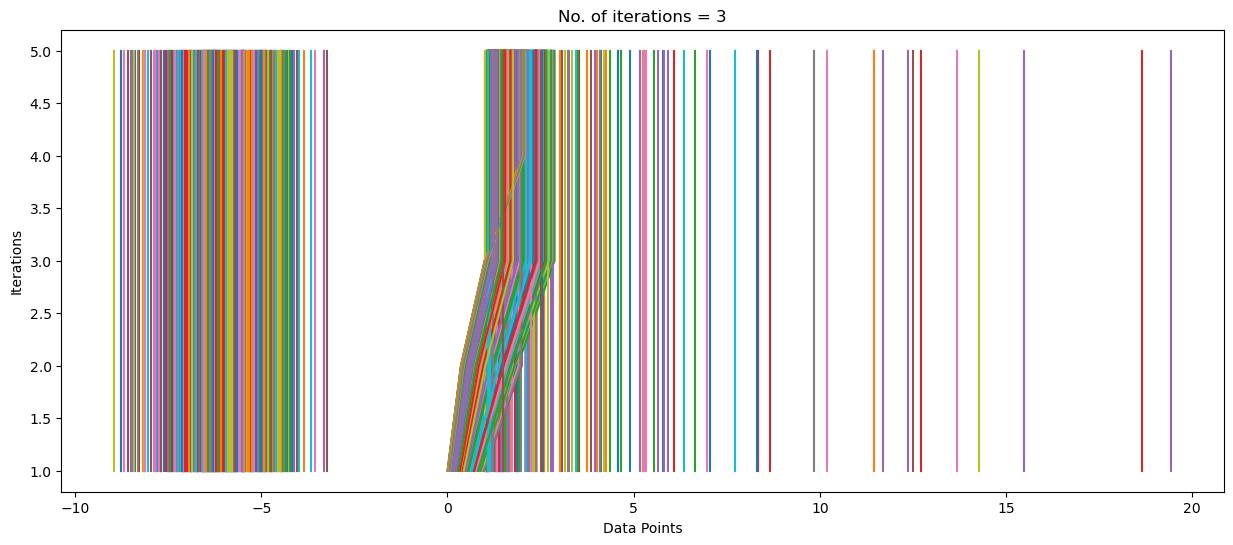

In [547]:

# TODO: plot the trajectories
plt.figure(figsize=(15,6))
for i in range(0,x.shape[0]):
    plt.plot(trajectories.T[i],iter.T[i]);
plt.xlabel("Data Points")
plt.ylabel("Iterations")
plt.title(f"Trajectories with No. of iterations = {step}")


In [557]:
# TODO: repeat the above for "blurring" mean shift
x = data[:200]  # use e.g. the first 200 points
xt = x
trajectories = [xt]
max_steps = 100
for step in range(max_steps):
    
    # TODO: update xt with your mean shift step
    local_means = mean_shift_step(xt, xt) #we reuse the shifted datapoints instead of the originaal data points.
    xt  = xt+local_means
    
    # print(step)
    trajectories.append(xt)
    if np.allclose(trajectories[-1], trajectories[-2]):  # break in case of convergence
        break
trajectories = np.stack(trajectories)
n_steps = len(trajectories) - 1

Text(0.5, 1.0, 'Trajectories with No. of iterations = 2')

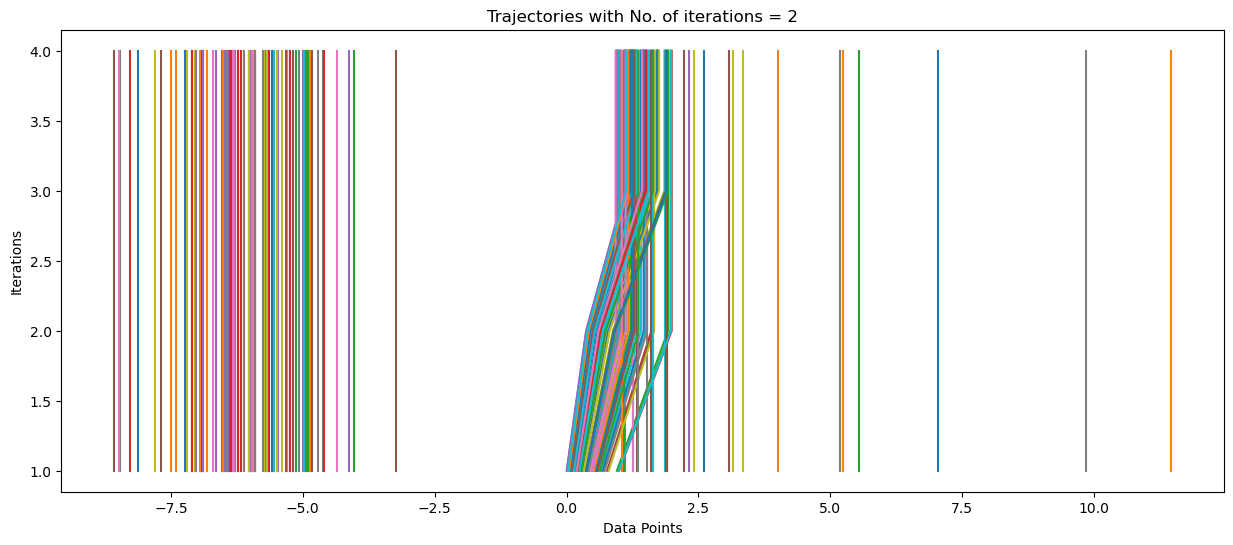

In [558]:
a = np.ones((1,x.shape[0]))
a = a.flatten()
iter = [a]
for i in range(0,trajectories.shape[0]-1):
    iter.append(a+1+i)
iter = np.array(iter)

plt.figure(figsize=(15,6))
for i in range(0,x.shape[0]):
    plt.plot(trajectories.T[i],iter.T[i]);
plt.xlabel("Data Points")
plt.ylabel("Iterations")
plt.title(f"Trajectories with No. of iterations = {step}")

### The blurring mean-shift is an accelerated version which uses the original data only in the first step, then re-smoothes previous estimates. We see that the algorithm has converged in 2 iterations where as the previous one had converged in 2 iterations.

Comments: I do noot understand why thepoints lying under first KDE peak (as seen in Ex1) did not move from their positions. One explaination could be that the r=1 was small.

In [573]:
x = data[:200]  # use e.g. the first 200 points
xt = x
trajectories = [xt]
max_steps = 100
for step in range(max_steps):
    
    # TODO: update xt with your mean shift step
    local_means = mean_shift_step(xt, xt,r=7) #we reuse the shifted datapoints instead of the originaal data points.
    xt  = xt+local_means
    
    # print(step)
    trajectories.append(xt)
    if np.allclose(trajectories[-1], trajectories[-2]):  # break in case of convergence
        break
trajectories = np.stack(trajectories)
n_steps = len(trajectories) - 1

Text(0.5, 1.0, 'Trajectories with No. of iterations = 3')

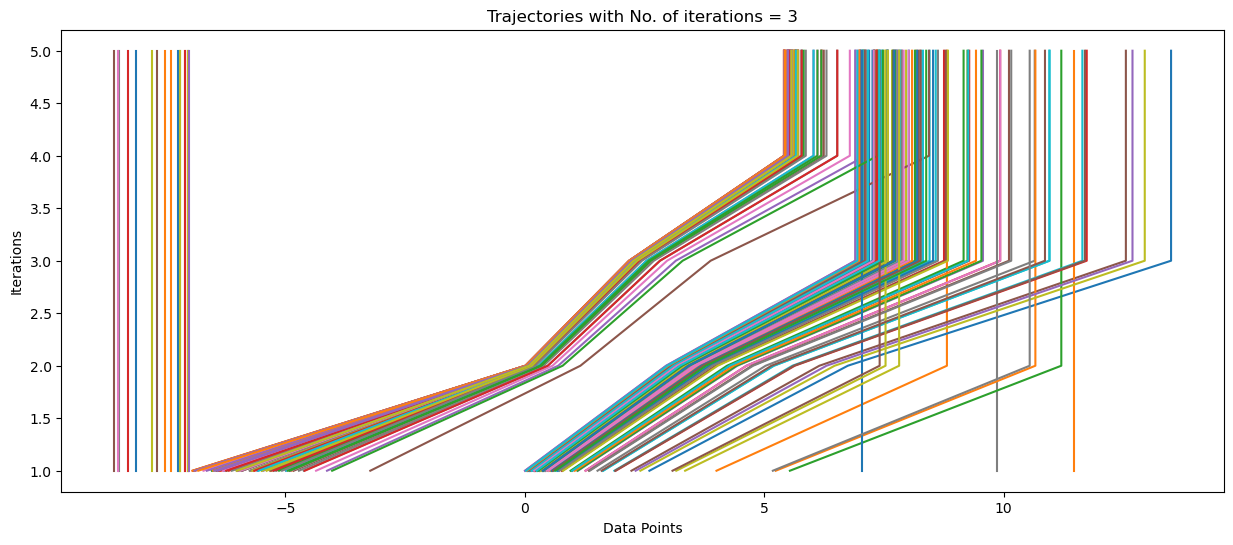

In [574]:
a = np.ones((1,x.shape[0]))
a = a.flatten()
iter = [a]
for i in range(0,trajectories.shape[0]-1):
    iter.append(a+1+i)
iter = np.array(iter)

plt.figure(figsize=(15,6))
for i in range(0,x.shape[0]):
    plt.plot(trajectories.T[i],iter.T[i]);
plt.xlabel("Data Points")
plt.ylabel("Iterations")
plt.title(f"Trajectories with No. of iterations = {step}")

Inorder to test repeated the algorithm with r=7. ISUSPECT the points to the left seem to join the bigger cluster instead of clustering amongst themselves.

## 4 K-Means

(b)

In [ ]:
from sklearn.cluster import KMeans

def kmeans_step(x, k, c=None, init='random'):
    """
    K-Means clustering on a p x N data matrix.
    
    Parameters
    ----------
    x : np.ndarray
        Data matrix of shape (p, N).
    k : int
        Number of cluster.
    c : np.ndarray, optional
        Current cluster centers. If None, the initialization as specified by 'init' will be used.
    init: str
        The initialization method to be used if c is None.
        
    Returns
    -------
    float, np.ndarray
        cost after the step, updated cluster centers
    """
    
    if c is not None: 
        assert c.shape[1] == k
        
    # Note: the documentation is your friend: 
    #       https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    
    # TODO: set n_cluster, init, n_init and max_iter appropriately
    single_step_kmeans = KMeans(
        n_clusters=, 
        init=, 
        max_iter=,
        n_init=,
    )
    
    # TODO call the single_step_kmeans
    
    # TODO get the current energy (you don't have to compute it - it's stored in single_step_kmeans)
    E = 
    
    # TODO read out cluster centers 
    c = 
    
    return E, c 
    

In [ ]:
# load the data (you can try both with the full normalized feature and the 2d umap projection)

features = np.load('data/dijet_features_normalized.npy')  # full features
# features = np.load('data/dijet_features_umap.npy')      # umap projection

print(f'{features.shape=}')

In [ ]:
def kmeans(x, k, max_steps=100, init='random'):
    c = None
    energies = []  # list of energies over the iterations. 
    for i in range(max_steps):
        # Call the kmeans_step implemented above to get the energy and the next cluster centers
        E, c = kmeans_step(x, k=k, c=c, init=init)
        energies.append(E)
        
        # Stop the loop if there was no improvement
        if i>=2 and energies[-1] == energies[-2]:
            break
    energies = np.array(energies)
    return energies  # return array of energies


for k in [3, 5, 10, 20]:
    for init in ['k-means++', 'random']:
        # TODO: for the given k and init, run k-means 20 times or more (using the kmeans function above)
        #       and plot the resulting energy trajectores
        

### 5 Bonus

Number of modes icrease when we increase the number of bandwidths. We see this in the first exercise. Kernel becomes flatter for higher bandwidths.